1. longitude – долгота
2. latitude – широта
3. housing_median_age - медианный возраст зданий
4. total_rooms - общее кол-во зданий
5. total_bedrooms - Общее кол-во спален
6. population - кол-во жителей
7. households - кол-во семей
8. median_income - средний доход
9. median_house_value - медианная стоимость дома

In [90]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('sample_data/california_housing_train.csv',sep=',')


**Задача №63.**
1. Изобразите отношение households к population с
помощью точечного графика
2. Визуализировать longitude по отношения к
median_house_value, используя линейный график
3. Представить гистограмму по housing_median_age
4. Изобразить гистограмму по median_house_value с
оттенком housing_median_age

<Axes: xlabel='households', ylabel='population'>

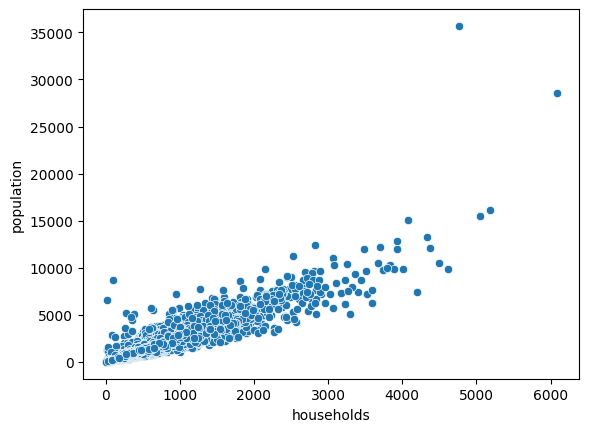

In [91]:
sns.scatterplot(data = df, x = 'households', y = 'population')

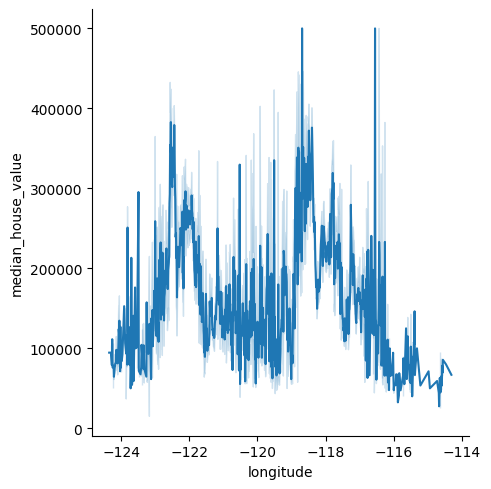

In [93]:
sns.relplot(data = df, x = 'longitude', y = 'median_house_value', kind='line')

<Axes: xlabel='housing_median_age', ylabel='Count'>

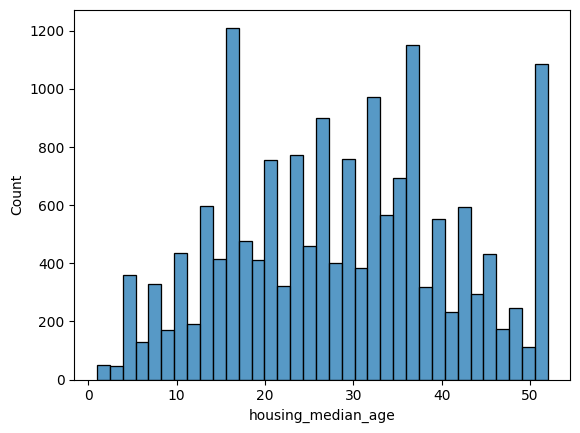

In [94]:
sns.histplot(data = df, x = 'housing_median_age')

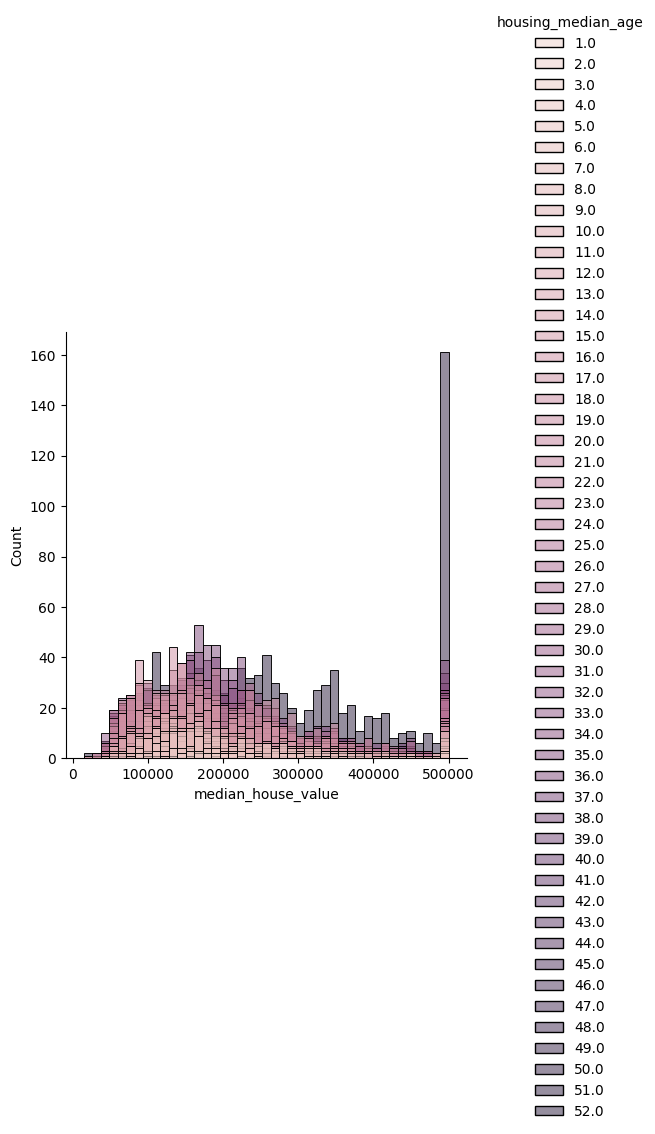

In [95]:
sns.displot(data = df, x = 'median_house_value', hue= 'housing_median_age')

***Задача №65.***

Написать EDA для датасета про пингвинов
Необходимо
+ Использовать 2-3 точечных графика
+ Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile
+ Использовать PairGrid с типом графика на ваш выбор
+ Изобразить Heatmap
+ Использовать 2-3 гистограммы

Чтобы подключить датасет с
пингвинами, воспользуйтесь данным
скриптом:

penguins = sns.load_dataset("penguins")

penguins.head()

In [97]:
df_p = sns.load_dataset("penguins")
df_p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

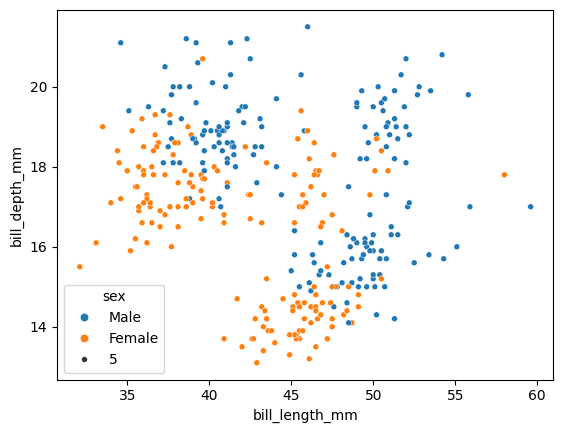

In [101]:
sns.scatterplot(data = df_p, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'sex', size = 5)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

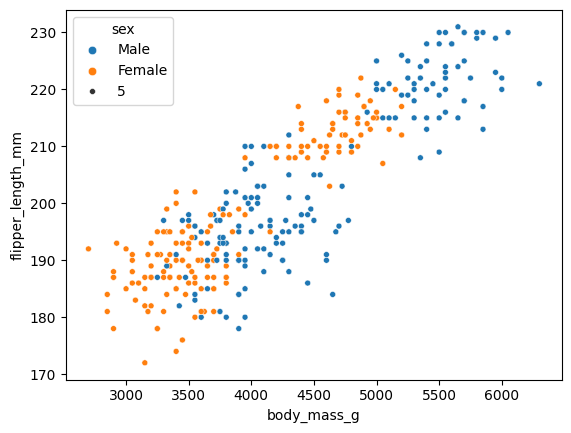

In [102]:
sns.scatterplot(data = df_p, x = 'body_mass_g', y = 'flipper_length_mm', hue = 'sex', size = 5)

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

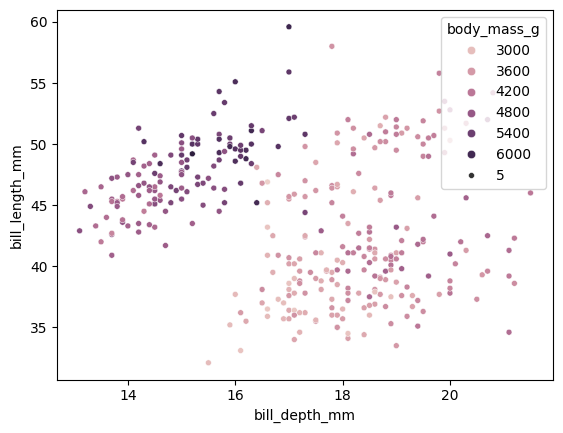

In [103]:
sns.scatterplot(data = df_p, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'body_mass_g', size = 5)

2.

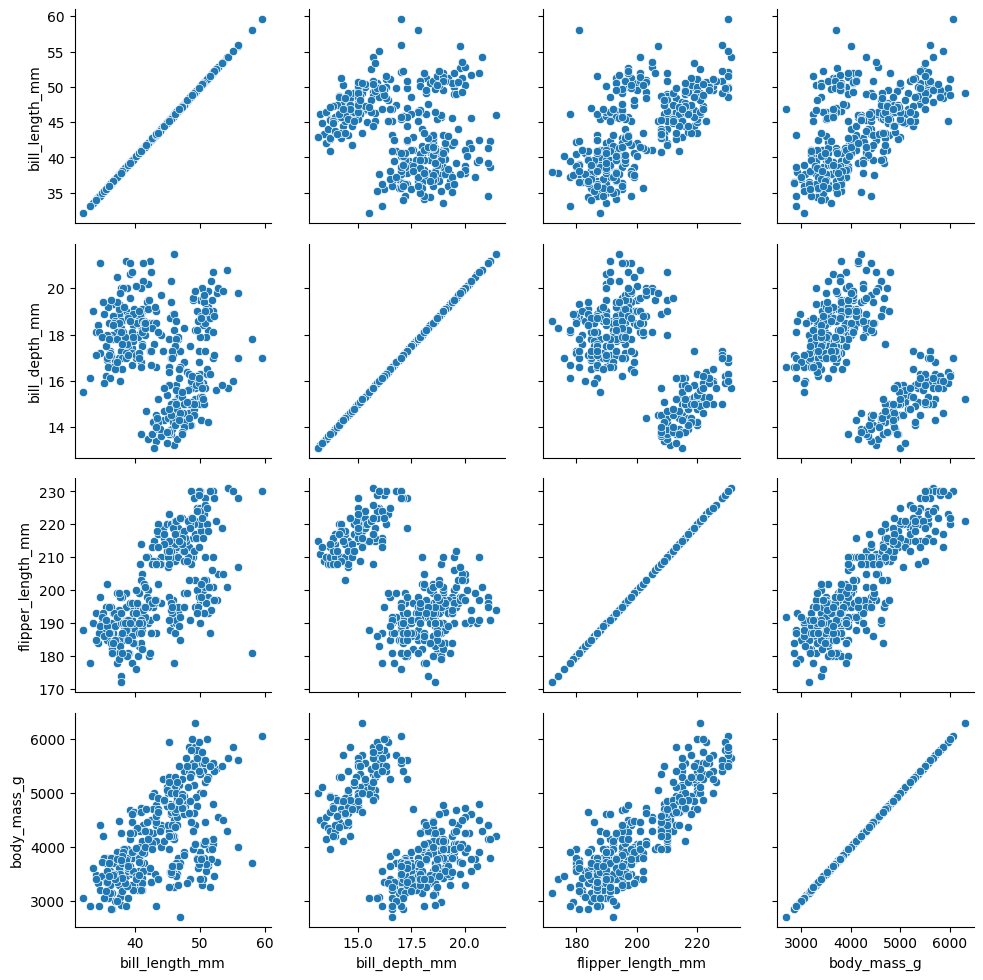

In [104]:
list1 = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']
g = sns.PairGrid(df_p[list1])
g.map(sns.scatterplot)

3.

<Axes: xlabel='bill_length_mm', ylabel='Count'>

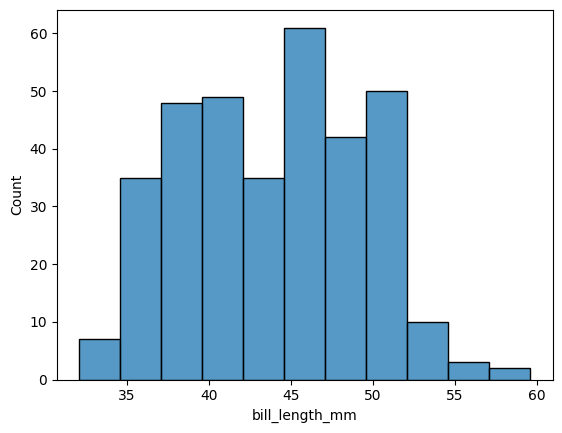

In [105]:
sns.histplot(data = df_p, x = 'bill_length_mm')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

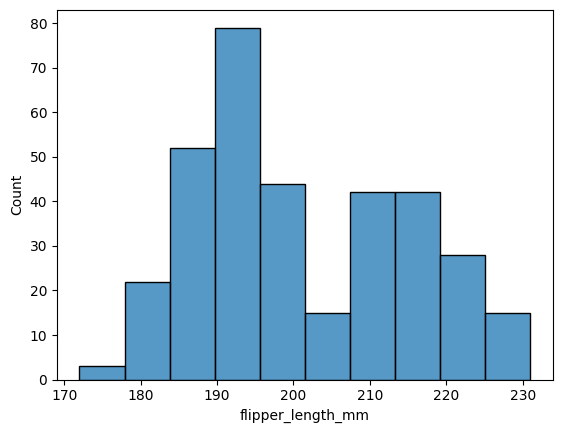

In [106]:
sns.histplot(data = df_p, x = 'flipper_length_mm')

**Задача №67.**
1. Создать новый столбец в таблице с
пингвинами, который будет отвечать за
показатель длины клюва пингвина.
high - длинный(от 42)
middle - средний(от 35 до 42)
low - маленький(до 35)
Чтобы подключить датасет с
пингвинами, воспользуйтесь данным
скриптом:
penguins = sns.load_dataset("penguins")
penguins.head()

In [107]:
df_p.loc[df_p['bill_length_mm'] >= 42, 'height_group'] = 'high'
df_p.loc[df_p['bill_length_mm'] < 35, 'height_group'] = 'low'
df_p.loc[(df_p['bill_length_mm'] >= 35) & (df_p['bill_length_mm'] < 42), 'height_group'] = 'medium'

In [ ]:
df_p.head()

**Задача №69.**
1. Изобразить гистограмму по flipper_length_mm
с оттенком height_group. Сделать анализ


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

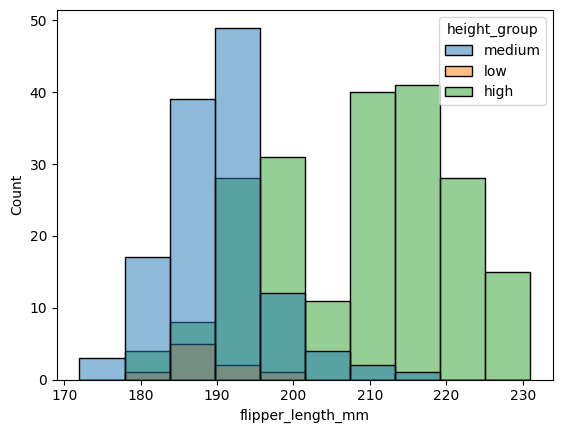

In [109]:
sns.histplot(data = df_p, x = 'flipper_length_mm', hue= 'height_group')

# **Домашка**

**Задача 44:** В ячейке ниже представлен код генерирующий DataFrame, которая состоит всего
из 1 столбца. Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без get_dummies?

import random

lst = ['robot'] * 10

lst += ['human'] * 10

random.shuffle(lst)

data = pd.DataFrame({'whoAmI':lst})

data.head()



In [130]:
import pandas as pd
import random

lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head()


,whoAmI
0,robot
1,robot
2,human
3,human
4,robot


In [131]:
# 1 способ

data1 = pd.get_dummies(data, columns=['whoAmI'])
data1.head()

,whoAmI_human,whoAmI_robot
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True


In [132]:
# 2 способ

list2 = list(data['whoAmI'].unique())
# list2
for i in list2:
  data.loc[data['whoAmI'] == i, i] = 1
  data.loc[data['whoAmI'] != i, i] = 0
data.head()

,whoAmI,robot,human
0,robot,1.0,0.0
1,robot,1.0,0.0
2,human,0.0,1.0
3,human,0.0,1.0
4,robot,1.0,0.0
